In [20]:
import pandas as pd
import os
import subprocess
from glob import glob


# Preparing input preseq reads counts

## RT

In [15]:
RTBC_reads_per_umi = pd.read_csv("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/RPTR_BC_reads_per_umi.csv", index_col=0)
RTBC_reads_per_umi

,RPTR_BC,UMI,reads,name
0,AAAAAAAGATAAGT,AGCCCAGGATGA,1,Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAA...
1,AAAAAAAGATAAGT,ACATCCGACACC,1,Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAA...
2,AAAAAAAGATAAGT,GAAATCCCCCTC,1,Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAA...
3,AAAAAAAGATAAGT,CCGTCGGACACA,1,Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAA...
4,AAAAACACATAAAA,GCTGCGGCGGTT,1,Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAA...
...,...,...,...,...
16829,TTTTTCGGGTGATG,CGCGGAAAAACC,1,Staller_RP_2_5_MVS_0035_I1_TTGTCACCAA_CGCACGAA...
16830,TTTTTGAGCTCGCC,AAAGAGTGCCAC,1,Staller_RP_2_5_MVS_0035_I1_TTGTCACCAA_CGCACGAA...
16831,TTTTTGTATCCACC,ATGTGAAGAGAG,1,Staller_RP_2_5_MVS_0035_I1_TTGTCACCAA_CGCACGAA...
16832,TTTTTTCGCACACG,AATGGCTATTCG,1,Staller_RP_2_5_MVS_0035_I1_TTGTCACCAA_CGCACGAA...


In [33]:
# Need to save with at least one row as 4, otherwise cant run
for file_name in RTBC_reads_per_umi["name"].unique():
    print("/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_" + file_name)
    
    # Select only rows for this file
    file_RTBC_reads_per_umi = RTBC_reads_per_umi[RTBC_reads_per_umi['name'] == file_name]
    
    # Group by molecule
    file_molecule_counts = (
        file_RTBC_reads_per_umi
        .groupby(["RPTR_BC", "UMI"], as_index=False)["reads"]
        .sum()
    )
    
    # Find the row with the maximum reads
    max_idx = file_molecule_counts["reads"].idxmax()
    
    # Set the highest read count to 4 (preseq requires at least one 4+)
    file_molecule_counts.loc[max_idx, "reads"] = 4
    
    # Save counts.txt for preseq
    counts_file = os.path.join(
        "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_" + file_name,
        "preseq_input.txt"
    )
    
    file_molecule_counts["reads"].to_csv(
        counts_file,
        index=False,
        header=False
    )

/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAACTC_S26
/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_2_MVS_0034_I1_TTACGGTGAG_AAGTATGACC_S20
/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_30_MVS_0039_I1_AACCTGTCGT_GCTGCAGCTT_S25
/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_20_MVS_0038_I1_CTGTACTAAG_CTGCCATACT_S24
/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_60_MVS_0058_I1_AGGCGTCCTT_ACTGTCCAAT_S28
/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_15_MVS_0037_I1_ATCAGTGGTC_CTAGGATCTA_S23
/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_

In [35]:
molecule_counts = (
    RTBC_reads_per_umi
    .groupby(["RPTR_BC", "UMI"], as_index=False)["reads"]
    .sum()
)
molecule_counts

,RPTR_BC,UMI,reads
0,AAAAAAACCTCCCA,CTACTAGCGGGA,1
1,AAAAAAAGATAAGT,AACCCTTAAGGG,1
2,AAAAAAAGATAAGT,ACATCCGACACC,1
3,AAAAAAAGATAAGT,ACCCTCACCCAC,1
4,AAAAAAAGATAAGT,AGAAGGTTTAAA,1
...,...,...,...
498599,TTTTTTTCATCAAC,TCCCACCGTAAT,1
498600,TTTTTTTCATCAAC,TTCCTAAGATAC,1
498601,TTTTTTTCATCAAC,TTGCTAAAAGAA,1
498602,TTTTTTTTCGTTTA,CCTCGAGATTTC,1


In [36]:
molecule_counts['reads'].value_counts()

reads
1    491766
2      6767
3        71
Name: count, dtype: int64

# Running preseq

In [37]:
# Path to your preseq binary in the conda env
preseq_bin = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/conda/preseq/bin/preseq"

# Base directory containing umi_* folders
BASE_DIR = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/"

# Find all umi_* directories
umi_dirs = sorted(glob(os.path.join(BASE_DIR, "umi_*RP*")))

print(f"Found {len(umi_dirs)} UMI directories")
umi_dirs

Found 10 UMI directories


['/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_0_MVS_0033_I1_AAGAGGCTAA_CGATAAGGCG_S19',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_10_MVS_0036_I1_AGCTTACCTT_CACTTAGCAC_S22',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_15_MVS_0037_I1_ATCAGTGGTC_CTAGGATCTA_S23',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_20_MVS_0038_I1_CTGTACTAAG_CTGCCATACT_S24',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_2_MVS_0034_I1_TTACGGTGAG_AAGTATGACC_S20',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_30_MVS_0039_I1_AACCTGTCGT_GCTGCAGCTT_S25',
 '/global/scratch/projects/fc_mvslab/OpenProjects/Sanj

In [38]:
# Loop over directories and run preseq
for umi_dir in umi_dirs:
    input_file = os.path.join(umi_dir, "preseq_input.txt")
    output_file = os.path.join(umi_dir, "preseq_yield.txt")

    if not os.path.exists(input_file):
        print(f"Missing input: {input_file}")
        continue

    cmd = [
        preseq_bin,
        "lc_extrap",
        "-V",
        input_file,
        "-o",
        output_file
    ]

    print(f"▶ Running preseq on {os.path.basename(umi_dir)}")

    try:
        subprocess.run(
            cmd,
            check=True,
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        print(f"Saved: {output_file}")

    except subprocess.CalledProcessError as e:
        print(f"preseq failed for {umi_dir}")
        print(e.stderr)

▶ Running preseq on umi_Staller_RP_2_0_MVS_0033_I1_AAGAGGCTAA_CGATAAGGCG_S19
preseq failed for /global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_0_MVS_0033_I1_AAGAGGCTAA_CGATAAGGCG_S19
ERROR:	max count before zero is less than min required count (4) duplicates removed

▶ Running preseq on umi_Staller_RP_2_10_MVS_0036_I1_AGCTTACCTT_CACTTAGCAC_S22
preseq failed for /global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_10_MVS_0036_I1_AGCTTACCTT_CACTTAGCAC_S22
ERROR:	too many defects in the approximation, consider running in defect mode

▶ Running preseq on umi_Staller_RP_2_15_MVS_0037_I1_ATCAGTGGTC_CTAGGATCTA_S23
preseq failed for /global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/umi_Staller_RP_2_15_MVS_0037_I1_ATCAGTGGTC_CTAGGATCTA_S23
ERROR:	too many defects in the approximation, consider running in defect mode

▶ Running

# Analyzign files which worked

Found 5 preseq yield files
umi_Staller_RP_2_40_MVS_0040_I1_TATGAGACGA_ACTGTAACTC_S26: slope at last point = 0.0000


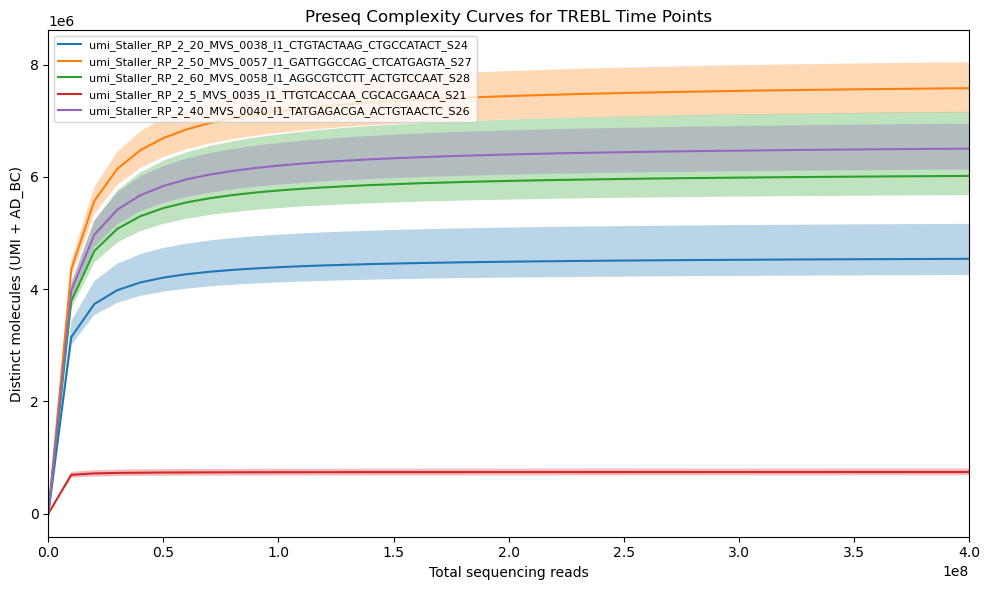

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os

# -------------------------------
# Parameters
# -------------------------------
BASE_DIR = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/"
DOWNSAMPLE = 10

# -------------------------------
# Find preseq output files
# -------------------------------
preseq_files = glob(os.path.join(BASE_DIR, "umi_*", "preseq_yield.txt"))
print(f"Found {len(preseq_files)} preseq yield files")

# -------------------------------
# Plot all curves
# -------------------------------
plt.figure(figsize=(10,6))

for f in preseq_files:

    df = pd.read_csv(
            f,
            sep='\t',
            comment='#',
            header=None,
            names=['total_reads', 'expected_distinct', 'lower_CI', 'upper_CI']
        )
        
    # Convert to numeric
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Downsample
    df = df.iloc[::DOWNSAMPLE, :]
    
    folder_name = os.path.basename(os.path.dirname(f))
    
    # Plot expected curve
    plt.plot(df['total_reads'], df['expected_distinct'], label=folder_name)
    
    # Plot shaded CI
    plt.fill_between(df['total_reads'], df['lower_CI'], df['upper_CI'], alpha=0.3)

# Compute slope at last point safely
if len(df) > 1:
    slope = (df['expected_distinct'].iloc[-1] - df['expected_distinct'].iloc[-2]) / \
            (df['total_reads'].iloc[-1] - df['total_reads'].iloc[-2])
    print(f"{folder_name}: slope at last point = {slope:.4f}")
else:
    print(f"{folder_name}: not enough points to compute slope")

plt.xlim(0, 0.04 * 10 ** 10)

plt.xlabel("Total sequencing reads")
plt.ylabel("Distinct molecules (UMI + AD_BC)")
plt.title("Preseq Complexity Curves for TREBL Time Points")
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

Found 5 preseq yield files
T20: slope at last point = 0.0000
T50: slope at last point = 0.0000
T60: slope at last point = 0.0000
T5: slope at last point = 0.0000
T40: slope at last point = 0.0000


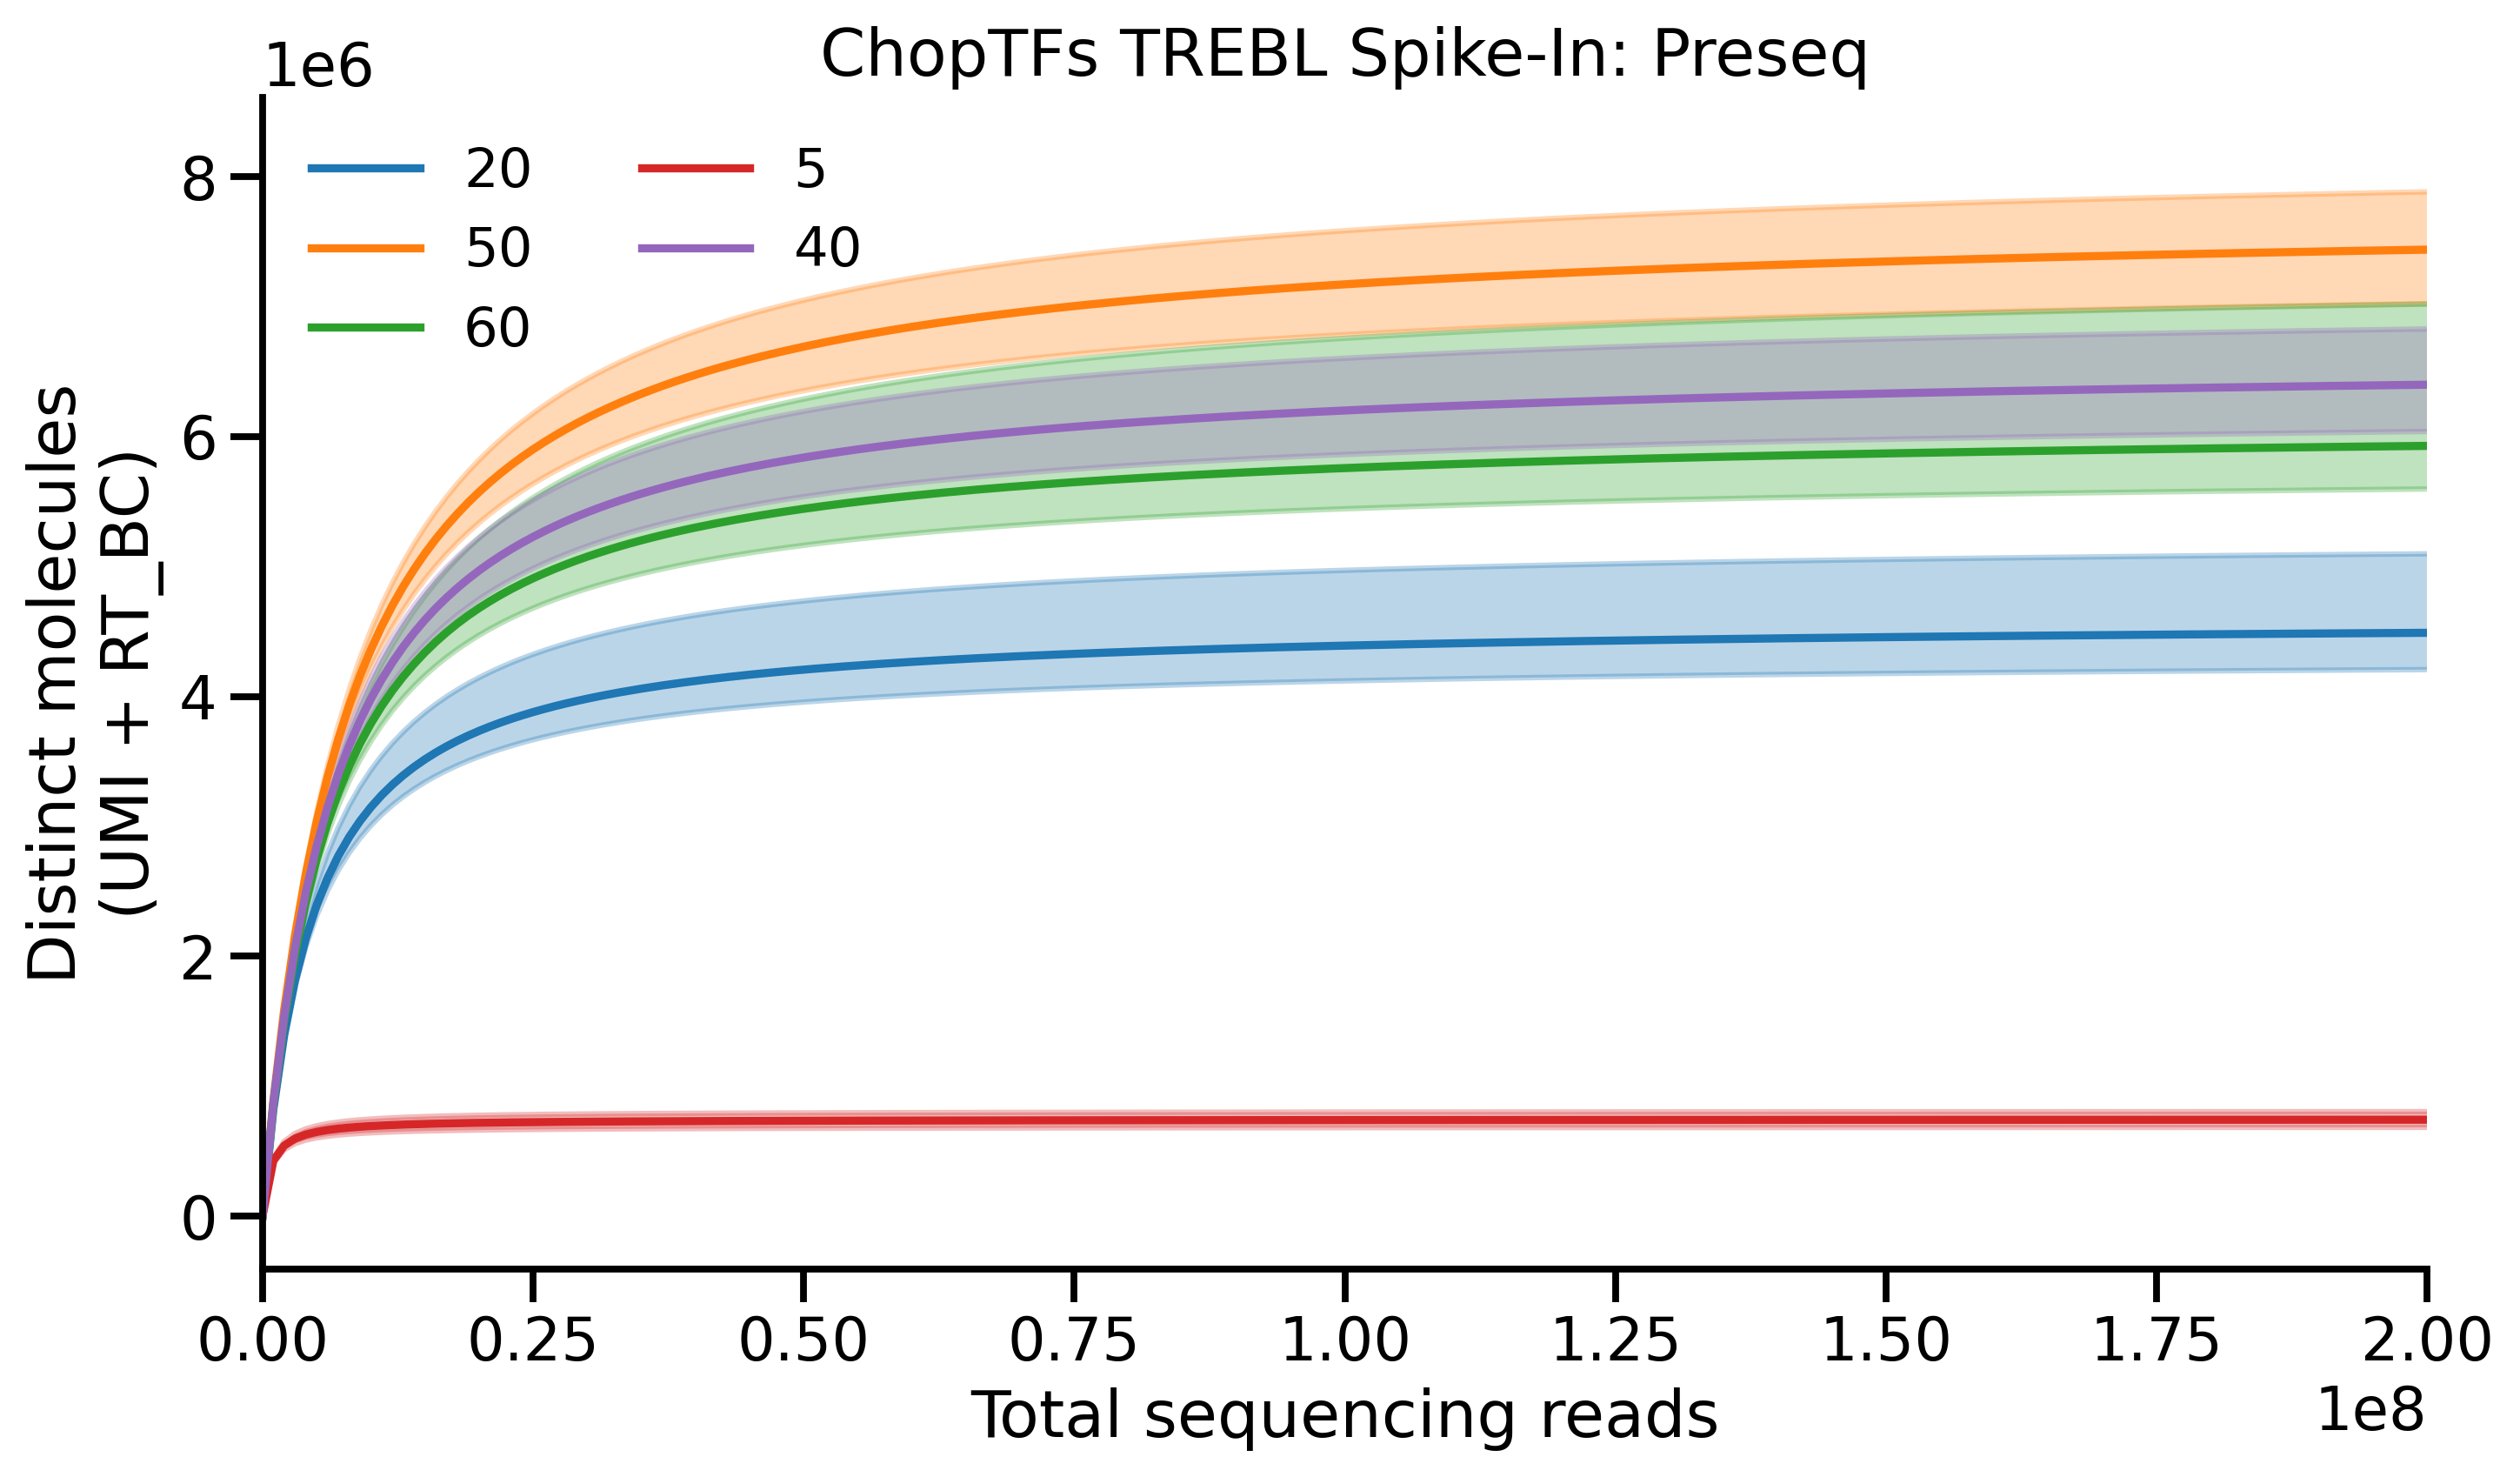

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import re
import matplotlib.cm as cm
import seaborn as sns

# -------------------------------
# Parameters
# -------------------------------
BASE_DIR = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/"
DOWNSAMPLE = 1

# -------------------------------
# Find preseq output files
# -------------------------------
preseq_files = glob(os.path.join(BASE_DIR, "umi_*", "preseq_yield.txt"))
print(f"Found {len(preseq_files)} preseq yield files")

# -------------------------------
# Plot all curves
# -------------------------------
sns.set_context('talk')
plt.figure(figsize=(10,6), dpi = 300)

# Create a colormap for sequential coloring
colors = sns.color_palette('tab10', len(preseq_files))

for i, f in enumerate(preseq_files):
    df = pd.read_csv(
            f,
            sep='\t',
            comment='#',
            header=None,
            names=['total_reads', 'expected_distinct', 'lower_CI', 'upper_CI']
        )
        
    # Convert to numeric
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Downsample
    df = df.iloc[::DOWNSAMPLE, :]
    
    # Extract folder name
    folder_name = os.path.basename(os.path.dirname(f))
    
    # Extract time point using regex: number between "2_" and "_MVS"
    m = re.search(r'2_(\d+)_MVS', folder_name)
    time_pt = m.group(1) if m else folder_name
    
    # Plot expected curve with sequential color
    plt.plot(df['total_reads'], df['expected_distinct'], label=f"{time_pt}", color=colors[i])
    
    # Plot shaded CI
    plt.fill_between(df['total_reads'], df['lower_CI'], df['upper_CI'], alpha=0.3, color=colors[i])
    
    # Compute slope at last point safely
    if len(df) > 1:
        slope = (df['expected_distinct'].iloc[-1] - df['expected_distinct'].iloc[-2]) / \
                (df['total_reads'].iloc[-1] - df['total_reads'].iloc[-2])
        print(f"T{time_pt}: slope at last point = {slope:.4f}")
    else:
        print(f"T{time_pt}: not enough points to compute slope")

# Optional: limit x-axis for readability
plt.xlim(0, 0.02 * 10 ** 10)

plt.xlabel("Total sequencing reads")
plt.ylabel("Distinct molecules\n(UMI + RT_BC)")
plt.title("ChopTFs TREBL Spike-In: Preseq")
plt.legend(fontsize='small', ncols = 2, frameon=False)
plt.tight_layout()
sns.despine()
plt.show()

Found 5 preseq yield files
T20: slope at last point = 0.0000
T50: slope at last point = 0.0000
T60: slope at last point = 0.0000
T5: slope at last point = 0.0000
T40: slope at last point = 0.0000


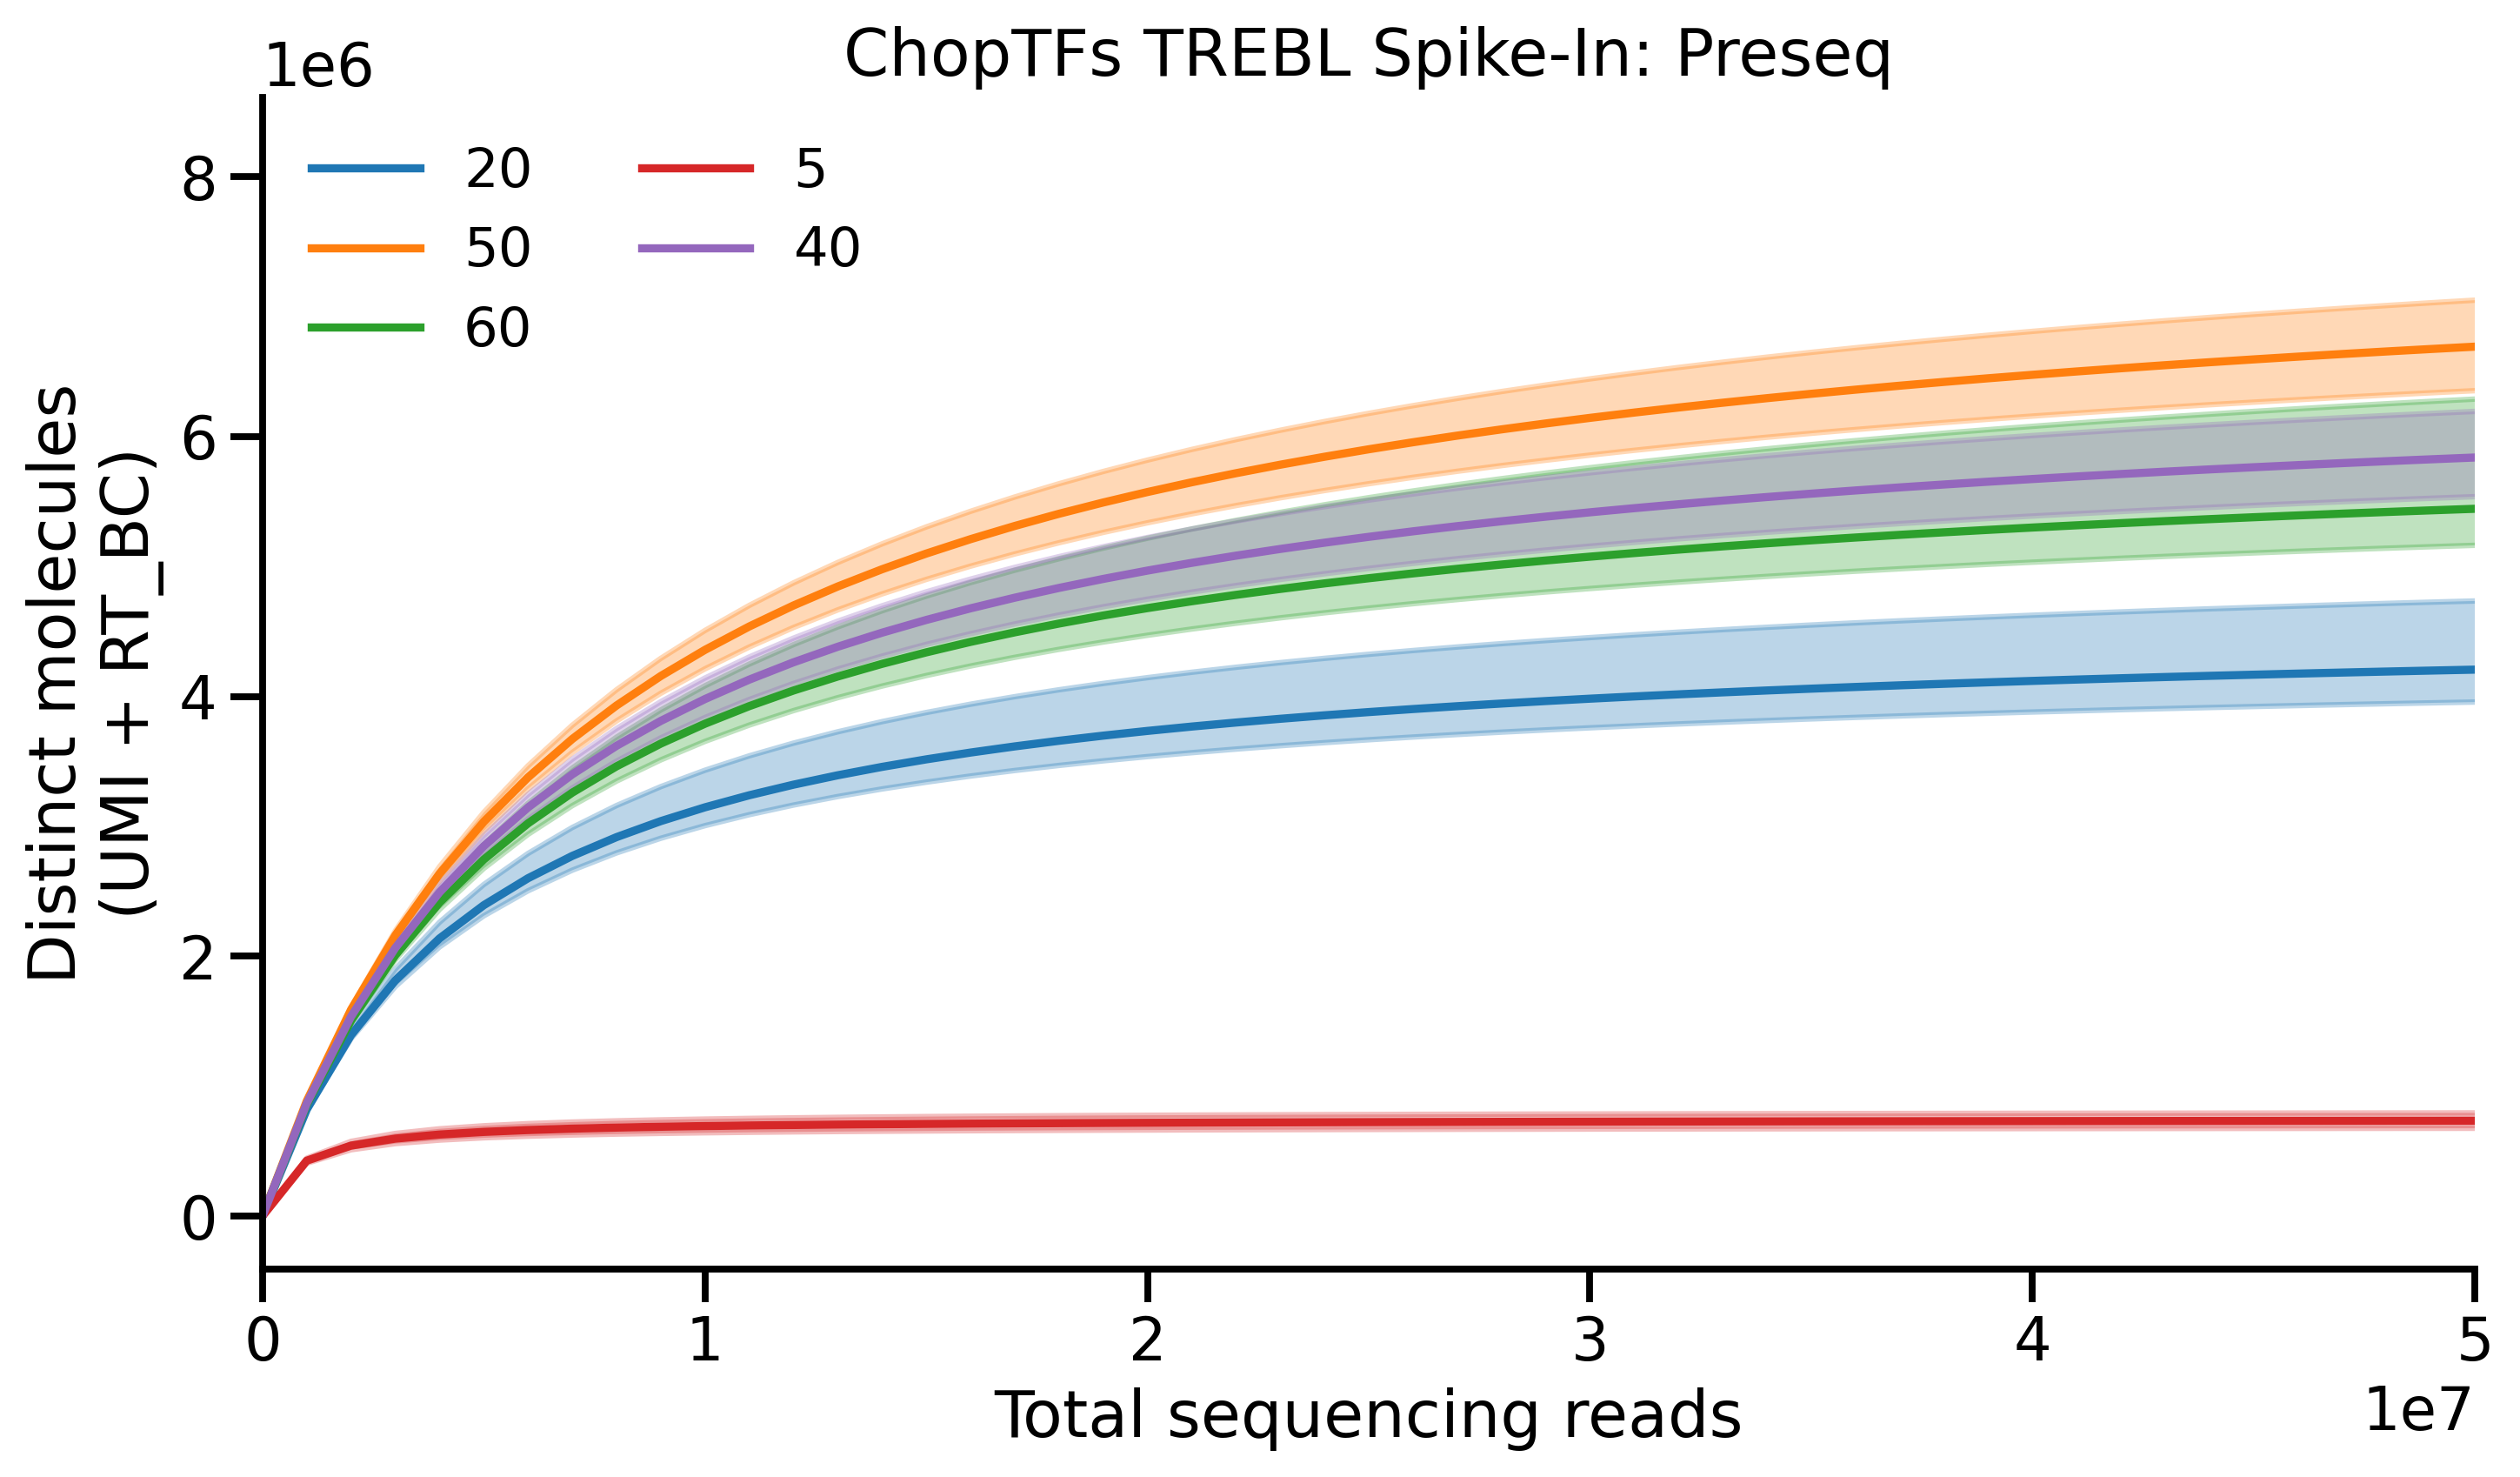

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os
import re
import matplotlib.cm as cm
import seaborn as sns

# -------------------------------
# Parameters
# -------------------------------
BASE_DIR = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/output/ChopTFs_TREBL_exp_spike_in/"
DOWNSAMPLE = 1

# -------------------------------
# Find preseq output files
# -------------------------------
preseq_files = glob(os.path.join(BASE_DIR, "umi_*", "preseq_yield.txt"))
print(f"Found {len(preseq_files)} preseq yield files")

# -------------------------------
# Plot all curves
# -------------------------------
sns.set_context('talk')
plt.figure(figsize=(10,6), dpi = 300)

# Create a colormap for sequential coloring
colors = sns.color_palette('tab10', len(preseq_files))

for i, f in enumerate(preseq_files):
    df = pd.read_csv(
            f,
            sep='\t',
            comment='#',
            header=None,
            names=['total_reads', 'expected_distinct', 'lower_CI', 'upper_CI']
        )
        
    # Convert to numeric
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    
    # Downsample
    df = df.iloc[::DOWNSAMPLE, :]
    
    # Extract folder name
    folder_name = os.path.basename(os.path.dirname(f))
    
    # Extract time point using regex: number between "2_" and "_MVS"
    m = re.search(r'2_(\d+)_MVS', folder_name)
    time_pt = m.group(1) if m else folder_name
    
    # Plot expected curve with sequential color
    plt.plot(df['total_reads'], df['expected_distinct'], label=f"{time_pt}", color=colors[i])
    
    # Plot shaded CI
    plt.fill_between(df['total_reads'], df['lower_CI'], df['upper_CI'], alpha=0.3, color=colors[i])
    
    # Compute slope at last point safely
    if len(df) > 1:
        slope = (df['expected_distinct'].iloc[-1] - df['expected_distinct'].iloc[-2]) / \
                (df['total_reads'].iloc[-1] - df['total_reads'].iloc[-2])
        print(f"T{time_pt}: slope at last point = {slope:.4f}")
    else:
        print(f"T{time_pt}: not enough points to compute slope")

# Optional: limit x-axis for readability
plt.xlim(0, 0.005 * 10 ** 10)

plt.xlabel("Total sequencing reads")
plt.ylabel("Distinct molecules\n(UMI + RT_BC)")
plt.title("ChopTFs TREBL Spike-In: Preseq")
plt.legend(fontsize='small', ncols = 2, frameon=False)
plt.tight_layout()
sns.despine()
plt.show()